In [27]:
from livneh import tools as lt
from numpy import ma
from mpl_toolkits import basemap
import glob
import gdal
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib as mpl
import matplotlib.patches as ptchs

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [29]:
regs = [1,2,3,4,6,7,8,9,12,13] # region codes
#data = pd.read_hdf('./budyko_working_er_all.hdf','df')
tmp = pd.read_hdf('./budyko_working.hdf','df')

In [30]:
longs,lats,RR_r2 = lt.pts2grid(tmp.frlat,tmp.frlon,tmp.RR_rsqrd)
#RR_r2[RR_r2<=0.3] = -9999
RR_rsqd = ma.masked_values(RR_r2,-9999)

In [31]:
m = basemap.Basemap(width=350000,height=500000,rsphere=(6370000,6370000),projection='lcc',
              lat_1=28,lat_2=50,lat_0=40,lon_0=-106) # make a Basemap projection with 

In [32]:
X,Y = m(longs,lats)

In [33]:
shps = glob.glob('/Users/barnhatb/Dropbox/virtual_share_win7/WSC_basins/HUC8/*.shp')

In [34]:
divide = '/Users/barnhatb/Dropbox/virtual_share_win7/continental_divide.shp'

{38: ([<matplotlib.lines.Line2D at 0x11978ce50>],
  [<matplotlib.text.Text at 0x12999aad0>]),
 40: ([<matplotlib.lines.Line2D at 0x119c5eed0>],
  [<matplotlib.text.Text at 0x12999ac90>]),
 42: ([<matplotlib.lines.Line2D at 0x12999a550>],
  [<matplotlib.text.Text at 0x118b9e0d0>])}

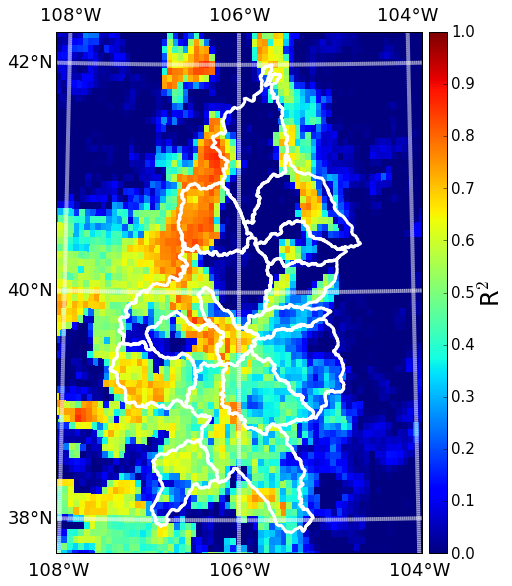

In [35]:
plt.figure(figsize=(7,14))
#m.pcolormesh(x,y,hs,cmap='Greys')
#m.pcolormesh(X,Y,RR_rsqd,vmin=0,vmax=1, alpha = 0.5)
pcol = m.pcolormesh(X,Y,RR_rsqd,vmin=0,vmax=1,linewidth=0)
#pcol.set_edgecolor('face')
#pcol.set_rasterized(True)
cb = m.colorbar()
#m.drawstates(color='0.5', linewidth=2)
for shp in shps:
    m.readshapefile(shp[0:-4],shp.split('/')[-1].split('.')[0], color='w', linewidth=3)
cb.set_label('R$^2$',fontsize=24)
cb.set_alpha(1)
cb.ax.tick_params(labelsize=15) 
cb.draw_all()
m.drawmeridians(np.arange(-110,-100,2),linewidth=4, color='w',labels=[1,1,1,1],fontsize=18)
m.drawparallels(np.arange(20,60,2), linewidth=4, color='w', labels=[1,0,0,0], fontsize=18)

#plt.savefig('./figures/wsc_pi16_wflux_rr_r2.png', dpi = 300, bbox_inches='tight')

In [36]:
print m.llcrnrx
print m.llcrnry
print 
print m.urcrnrx
print m.urcrnry

0.0
0.0

350000.0
500000.0


In [37]:
longs,lats,RR_slp = lt.pts2grid(tmp.frlat,tmp.frlon,tmp.RR_slope)
RR_slp = ma.masked_values(RR_slp,-9999)

{38: ([<matplotlib.lines.Line2D at 0x11a9093d0>],
  [<matplotlib.text.Text at 0x1192a1050>]),
 40: ([<matplotlib.lines.Line2D at 0x13481f450>],
  [<matplotlib.text.Text at 0x1192a1210>]),
 42: ([<matplotlib.lines.Line2D at 0x13481fa90>],
  [<matplotlib.text.Text at 0x1192a1610>])}

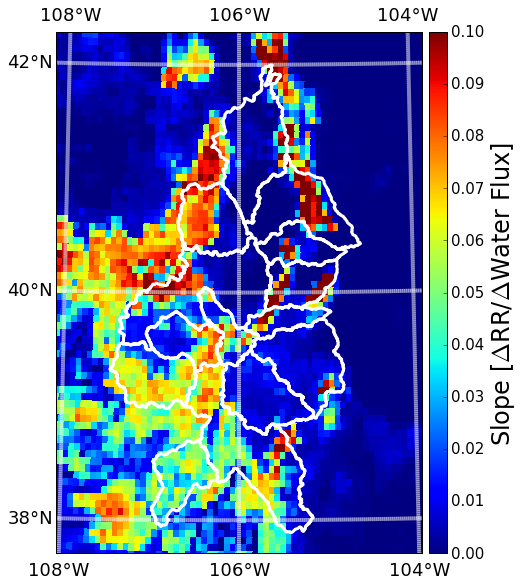

In [38]:
plt.figure(figsize=(7,14))
pcol = m.pcolormesh(X,Y,RR_slp,vmin=0,vmax=0.1)
pcol.set_edgecolor('face')
cb = m.colorbar()
for shp in shps:
    m.readshapefile(shp[0:-4],shp.split('/')[-1].split('.')[0], color='w', linewidth=3)

cb.set_label('Slope [$\Delta$RR/$\Delta$Water Flux]',fontsize=24)
cb.set_alpha(1)
cb.ax.tick_params(labelsize=15) 
cb.draw_all()
m.drawmeridians(np.arange(-110,-100,2),linewidth=4, color='w',labels=[1,1,1,1],fontsize=18)
m.drawparallels(np.arange(20,60,2), linewidth=4, color='w', labels=[1,0,0,0], fontsize=18)

#plt.savefig('./figures/wsc_pi16_wflux_rr_slp.png', dpi = 300, bbox_inches='tight')

In [39]:
longs,lats,RR_p = lt.pts2grid(tmp.frlat,tmp.frlon,tmp.RR_pval)
RR_p = ma.masked_values(RR_p,-9999)

{38: ([<matplotlib.lines.Line2D at 0x1367af210>],
  [<matplotlib.text.Text at 0x11a487e50>]),
 40: ([<matplotlib.lines.Line2D at 0x11a487290>],
  [<matplotlib.text.Text at 0x119343050>]),
 42: ([<matplotlib.lines.Line2D at 0x11a4878d0>],
  [<matplotlib.text.Text at 0x119343450>])}

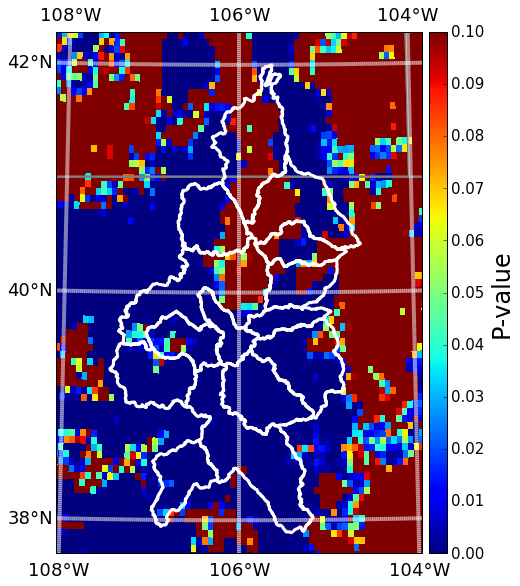

In [40]:
plt.figure(figsize=(7,14))
pcol = m.pcolormesh(X,Y,RR_p,vmin=0,vmax=0.1,alpha =1,rasterized=True,linewidth=0)
pcol.set_edgecolor('face')
cb = m.colorbar()
m.drawstates(color='0.5', linewidth=2)
for shp in shps:
    m.readshapefile(shp[0:-4],shp.split('/')[-1].split('.')[0], color='w', linewidth=3)

cb.set_label('P-value',fontsize=24)
cb.set_alpha(1)
cb.ax.tick_params(labelsize=15) 
cb.draw_all()
m.drawmeridians(np.arange(-110,-100,2),linewidth=4, color='w',labels=[1,1,1,1],fontsize=18)
m.drawparallels(np.arange(20,60,2), linewidth=4, color='w', labels=[1,0,0,0], fontsize=18)

#plt.savefig('./figures/wsc_pi16_wflux_rr_p.png', dpi = 300, bbox_inches='tight')

(-130.0, -60.0, 25.0, 55.0)

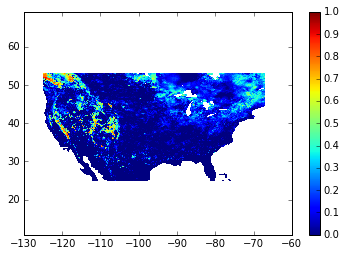

In [41]:
#data = tmp[(tmp["rc"]==1) | (tmp["rc"]==2) | (tmp["rc"]==3) | (tmp["rc"]==4) | (tmp["rc"]==6) | (tmp["rc"]==7) | (tmp["rc"]==8) | (tmp["rc"]==9) | (tmp["rc"]==12) | (tmp["rc"]==13)]
longs,lats,RR_r2 = lt.pts2grid(tmp.frlat,tmp.frlon,tmp.RR_rsqrd)
RR_rsqd = ma.masked_values(RR_r2,-9999)
#plt.pcolormesh(longs,lats,np.flipud(RR_r2))
plt.pcolormesh(longs,lats,np.flipud(RR_rsqd),vmin=0,vmax=1)
plt.colorbar()
plt.axis('equal')

In [42]:
hucdat = pd.read_csv('./figures/wsc_huc8_data.csv')

In [43]:
def shapemap(valkey,cmapvalkey,valname,title,cmap,cmapname,outfl,outflcolorbar,savefig):
    shp = '/Users/barnhatb/Dropbox/virtual_share_win7/WSC_basins/HUC8_merged'
    norm = mpl.colors.Normalize(vmin=hucdat[cmapvalkey].min(),vmax=hucdat[cmapvalkey].max())
    cm = mpl.cm.ScalarMappable(norm=norm,cmap=cmap)
    fig = plt.figure(figsize=(8,12))
    ax = fig.add_subplot(111)

    m = basemap.Basemap(llcrnrlon=-107.5,llcrnrlat=37.75,urcrnrlon=-104.5,urcrnrlat=42.25, epsg=4326) # make a Basemap projection with
    m.arcgisimage(service='World_Shaded_Relief',xpixels=1000, verbose = False)

    patches = []
    huc8 = []
    m.readshapefile(shp,'HUC8_merged', drawbounds=False)

    for info,shape in zip(m.HUC8_merged_info,m.HUC8_merged):
        patches.append(Polygon(np.array(shape),True))
        huc = int(info['HUC_8'])
        huc8.append(int(info['HUC_8']))

    for huc,patch in zip(huc8,patches):
        patches2 = []
        val = hucdat.loc[hucdat.huc8==huc,valkey]
        patches2.append(patch)
        ax.add_collection(PatchCollection(patches2, facecolor=cm.to_rgba(val), edgecolor='none',alpha=0.6))

    m.readshapefile(shp,'HUC8_merged', drawbounds=True) # draw the shapefile over the patches
    m.readshapefile('/Users/barnhatb/Dropbox/virtual_share_win7/continental_divide_Project','continental_divide_Project',linewidth=4,color='w')
    m.readshapefile('/Users/barnhatb/Dropbox/virtual_share_win7/Transbasin','Transbasin')

    for pt in m.Transbasin:
        m.plot(pt[0],pt[1],'.g', markersize=15)

    m.drawmeridians(np.arange(-110,-100,2),linewidth=2, color='k',labels=[1,1,0,1],fontsize=18)
    m.drawparallels(np.arange(20,60,2), linewidth=2, color='k', labels=[1,1,0,1], fontsize=18)
    plt.title(title,fontsize=22)

    if savefig:
        plt.savefig(outfl,dpi=300,bbox_inches='tight')

    fig = plt.figure(figsize=(8,0.5))
    ax = fig.add_subplot(111)
    cb = mpl.colorbar.ColorbarBase(ax,cmap=cmapname,norm=norm, orientation='horizontal')
    cb.set_label(valname,fontsize=18)
    if savefig:
        plt.savefig(outflcolorbar,dpi=300,bbox_inches='tight')

In [44]:
savefig = True

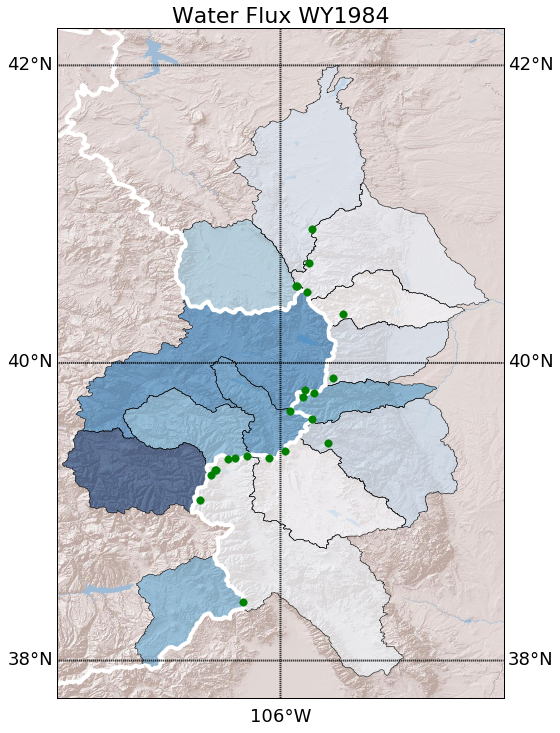

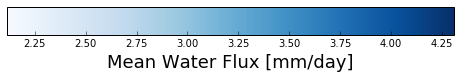

In [45]:
valkey = 'max_wflux'
cmapvalkey = 'max_wflux'
valname = 'Mean Water Flux [mm/day]'
title = 'Water Flux WY1984'
cmap = mpl.cm.Blues
cmapname = 'Blues'
outfl = './figures/max_wflux.png'
outflcolorbar = './figures/max_wflux_cb.png'

shapemap(valkey,cmapvalkey,valname,title,cmap,cmapname,outfl,outflcolorbar,savefig)

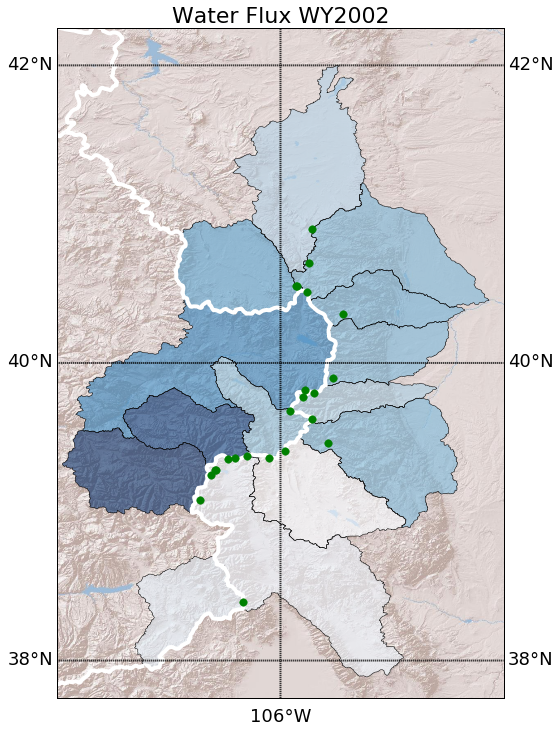

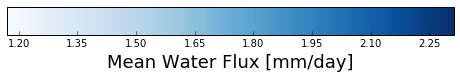

In [46]:
valkey = 'min_wflux'
cmapvalkey = 'min_wflux'
valname = 'Mean Water Flux [mm/day]'
title = 'Water Flux WY2002'
cmap = mpl.cm.Blues
cmapname = 'Blues'
outfl = './figures/min_wflux.png'
outflcolorbar = './figures/min_wflux_cb.png'

shapemap(valkey,cmapvalkey,valname,title,cmap,cmapname,outfl,outflcolorbar,savefig)

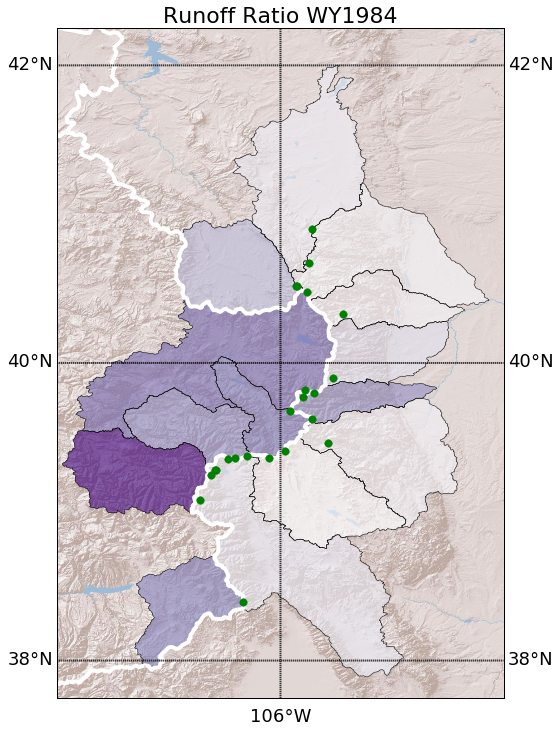

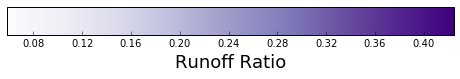

In [47]:
valkey = 'max_R_P'
cmapvalkey = 'max_R_P'
valname = 'Runoff Ratio'
title = 'Runoff Ratio WY1984'
cmap = mpl.cm.Purples
cmapname = 'Purples'
outfl = './figures/max_RR.png'
outflcolorbar = './figures/max_RR_cb.png'

shapemap(valkey,cmapvalkey,valname,title,cmap,cmapname,outfl,outflcolorbar,savefig)

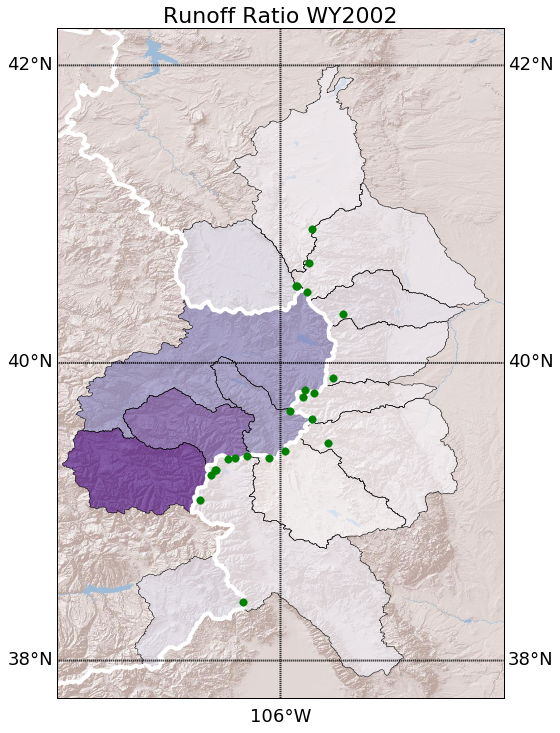

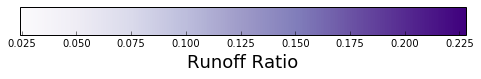

In [48]:
valkey = 'min_R_P'
cmapvalkey = 'min_R_P'
valname = 'Runoff Ratio'
title = 'Runoff Ratio WY2002'
cmap = mpl.cm.Purples
cmapname = 'Purples'
outfl = './figures/min_RR.png'
outflcolorbar = './figures/min_RR_cb.png'

shapemap(valkey,cmapvalkey,valname,title,cmap,cmapname,outfl,outflcolorbar,savefig)

In [49]:
hucdat = pd.read_csv('./figures/wsc_huc8_slopes.csv')

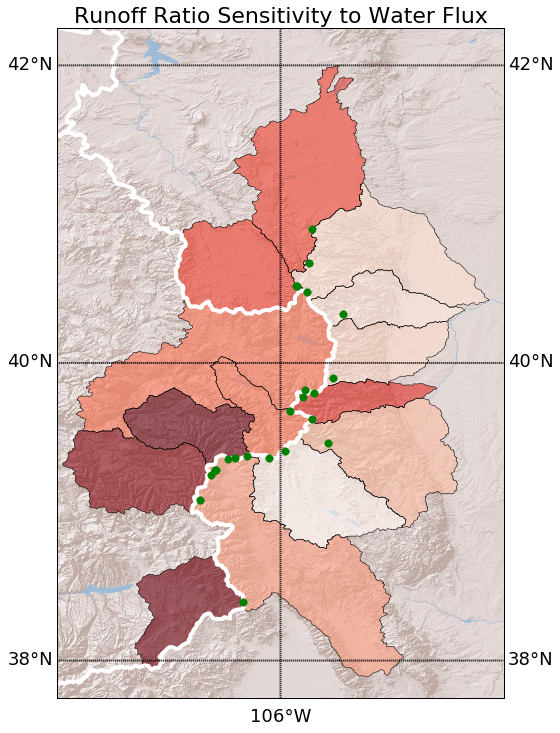

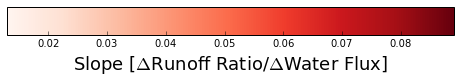

In [50]:
valkey = 'slope'
cmapvalkey = 'slope'
valname = 'Slope [$\Delta$Runoff Ratio/$\Delta$Water Flux]'
title = 'Runoff Ratio Sensitivity to Water Flux'
cmap = mpl.cm.Reds
cmapname = 'Reds'
outfl = './figures/slope.png'
outflcolorbar = './figures/slope_cb.png'

shapemap(valkey,cmapvalkey,valname,title,cmap,cmapname,outfl,outflcolorbar,savefig)

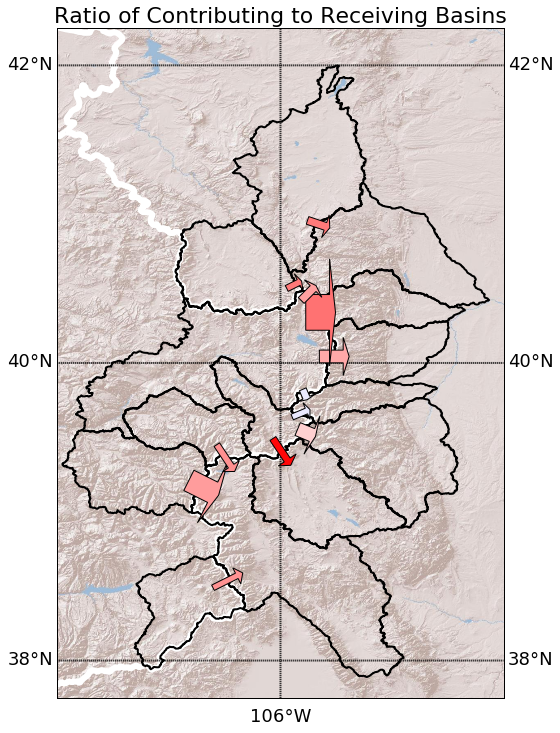

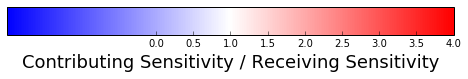

In [51]:
valkey = 'Ratio'
cmapvalkey = 'Ratio'
valname = 'Contributing Sensitivity / Receiving Sensitivity'
title = 'Ratio of Contributing to Receiving Basins'
outfl = './figures/ratio.png'
outflcolorbar = './figures/ratio_cb.png'
cmap = mpl.cm.bwr
cmapname = 'bwr'

shp = '/Users/barnhatb/Dropbox/virtual_share_win7/transbasin_summary'

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)

m = basemap.Basemap(llcrnrlon=-107.5,llcrnrlat=37.75,urcrnrlon=-104.5,urcrnrlat=42.25, epsg=4326) # make a Basemap projection with
m.arcgisimage(service='World_Shaded_Relief',xpixels=1000, verbose = False)
trans = pd.read_csv('./figures/total_diversion.csv')
rt = pd.read_excel('./figures/WSC_transfers_huc8_table.xls')
patches = []
transfer = []
ratio = []
m.readshapefile(shp,'transbasin_summary', drawbounds=False)

for patch,info in zip(m.transbasin_summary,m.transbasin_summary_info):
    patches.append(patch)
    dc = str(info['from_huc8'])+'_to_'+str(info['to_huc8'])
    transfer.append(trans.loc[trans.divcode==dc,'transfer'].as_matrix())
    ratio.append(rt.loc[rt.divcode==dc,valkey])

norm = mpl.colors.Normalize(vmin=-4+2.0,vmax=4)
cm = mpl.cm.ScalarMappable(norm=norm,cmap=cmap)
maxdiv = np.max(transfer)

m.readshapefile('/Users/barnhatb/Dropbox/virtual_share_win7/continental_divide_Project','continental_divide_Project',linewidth=6,color='w')
m.readshapefile('/Users/barnhatb/Dropbox/virtual_share_win7/WSC_basins/HUC8_merged','HUC8_merged', drawbounds=True, linewidth = 2) # draw the shapefile over the patches

xy = [(0.2,0.1),(0.2,-0.1),(0.12,-0.18),(0.12,-0.18),(0.12,-0.05),(0.12,0.05),
      (0.03,-0.07),(0.2,0.0),(0.2,0),(0.1,0.1),(0.15,-0.05),(0.1,0.05)]

for shape,div,rat,XY in zip(m.transbasin_summary,transfer,ratio,xy):
    #mrk_size = ((div/maxdiv)*25)+15 # for dots
    mrk_size = div/(maxdiv+0.2)+0.2
    ax.add_patch(ptchs.Arrow(shape[0]-XY[0]/2,shape[1]-XY[1]/2,XY[0],XY[1],width=mrk_size,facecolor=cm.to_rgba(rat)[0],zorder=10));
    #m.plot(shape[0],shape[1],'.k',markersize=mrk_size+4)
    #m.plot(shape[0],shape[1],'.',color=cm.to_rgba(rat)[0],markersize=mrk_size)

m.drawmeridians(np.arange(-110,-100,2),linewidth=2, color='k',labels=[1,1,0,1],fontsize=18)
m.drawparallels(np.arange(20,60,2), linewidth=2, color='k', labels=[1,1,0,1], fontsize=18)
plt.title(title,fontsize=22)

if savefig:
    plt.savefig(outfl,dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(8,0.5))
ax = fig.add_subplot(111)
cb = mpl.colorbar.ColorbarBase(ax,cmap=cmapname,norm=norm, orientation='horizontal')
cb.set_label(valname,fontsize=18)
cb.set_ticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
if savefig:
    plt.savefig(outflcolorbar,dpi=300,bbox_inches='tight')